In [12]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
print(tf.__version__)

2.2.0


In [8]:
%tensorflow_version 1.x
print(tf.__version__)

TensorFlow is already loaded. Please restart the runtime to change versions.
2.2.0


In [47]:
# y = wx + b  (w =weight,b =bias)

X =tf.placeholder("float")
Y =tf.placeholder("float")

W =tf.Variable(rng.randn(),"weight")
B =tf.Variable(rng.randn(),"bias")


In [32]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [33]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [49]:
#find prediction

#construct a linear model
pred = tf.add(tf.multiply(W,X),B)

#find cost function

cost = tf.reduce_sum(tf.pow(Y-pred,2))/(2*n_samples)

#apply gradient descent to reduce error
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#initialize the variables

init = tf.global_variables_initializer()

In [51]:
#Train the model

sess = tf.Session() 

# Run the initializer
sess.run(init)


#fit training data

for epoch in range(training_epochs):
  for(x,y) in zip(train_X,train_Y):
    sess.run(optimizer, feed_dict={X: x, Y: y})
    # Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
        
print("Optimization Finished!")

training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')


Epoch: 0050 cost= 0.191326395 W= 0.059661277 b= 1.09175
Epoch: 0050 cost= 0.191348121 W= 0.060539376 b= 1.09175
Epoch: 0050 cost= 0.191338405 W= 0.05924076 b= 1.09175
Epoch: 0050 cost= 0.191412866 W= 0.061744403 b= 1.09175
Epoch: 0050 cost= 0.191402540 W= 0.058106355 b= 1.09175
Epoch: 0050 cost= 0.191634357 W= 0.056078196 b= 1.09175
Epoch: 0050 cost= 0.191273093 W= 0.0598751 b= 1.09175
Epoch: 0050 cost= 0.191274837 W= 0.06012207 b= 1.09175
Epoch: 0050 cost= 0.191275209 W= 0.059745673 b= 1.09175
Epoch: 0050 cost= 0.191261366 W= 0.05838633 b= 1.09175
Epoch: 0050 cost= 0.191209167 W= 0.059457302 b= 1.09175
Epoch: 0050 cost= 0.191479802 W= 0.06368447 b= 1.09175
Epoch: 0050 cost= 0.191172063 W= 0.061039843 b= 1.09175
Epoch: 0050 cost= 0.191259295 W= 0.062255938 b= 1.09175
Epoch: 0050 cost= 0.191228926 W= 0.06195829 b= 1.09175
Epoch: 0050 cost= 0.191352367 W= 0.063093595 b= 1.09175
Epoch: 0050 cost= 0.191107109 W= 0.06117313 b= 1.09175
Epoch: 0100 cost= 0.178152233 W= 0.07096591 b= 1.09175
E

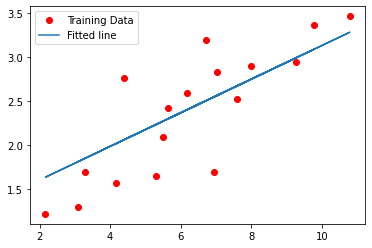

In [57]:
#plot the model

plt.plot(train_X,train_Y,"ro",label="Training Data")

plt.plot(train_X,sess.run(W)*train_X+sess.run(B),label="Fitted line")
plt.legend()
plt.show()

[2.52757909 2.11502201 2.92258055 2.73366681 2.31195027 2.88441616
 1.81581318 1.62499122]


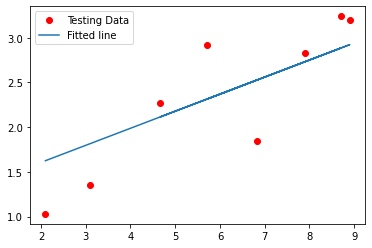

In [62]:
#testing the model

test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_Y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

test_pred = sess.run(W) * test_X + sess.run(B)

print(test_pred)

#plotiing
plt.plot(test_X,test_Y,"ro",label="Testing Data")

plt.plot(test_X,test_pred,label="Fitted line")
plt.legend()
plt.show()